# **Тестовое задание для позиции "Психолингвист-исследователь"**

**Задача:** проанализировать два предоставленных текста (отрывки из интервью) с использованием комплексного лингвистического и психолингвистического подхода.

**Часть 2:** Статистический анализ

Импортируем необходимые библиотеки

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import scipy.stats
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import ttest_rel, spearmanr, ttest_ind
from statsmodels.stats.multitest import multipletests

Загрузим полученный на предыдущем шаге датасет с метриками

In [34]:
df = pd.read_csv('interview_metrics_dataset.csv')

In [35]:
df.head()

,flesch_reading_ease,gunning_fog_index,coleman_liau_index,TTR,avg_freq,MTLD,self_focus,concreteness_index,avg_sentence_length,syntax_depth,...,uncertainty_count,hesitation_count,certainty_ratio,uncertainty_ratio,hesitation_ratio,active_voice_ratio,passive_voice_ratio,MSP,mlu_words,mlu_syllables
0,100.017778,8.755556,9.742640,0.441261,5879.765973,45.786035,0.063037,-0.863864,349.000000,17,...,1,12,0.021898,0.002433,0.029197,0.857143,0.142857,1.239264,19.571429,38.095238
1,109.714019,4.686957,10.759926,0.451404,4501.492484,64.537448,0.051836,-1.080629,154.333333,12,...,3,30,0.023689,0.005076,0.050761,0.966102,0.033898,1.159292,10.944444,21.796296


2.1 Описательная статистика

In [36]:
desc_stats = df.describe().T  # транспонируем для удобства
print(desc_stats)

                        count         mean         std          min  \
flesch_reading_ease       2.0   104.865898    6.856278   100.017778   
gunning_fog_index         2.0     6.721256    2.876934     4.686957   
coleman_liau_index        2.0    10.251283    0.719330     9.742640   
TTR                       2.0     0.446332    0.007172     0.441261   
avg_freq                  2.0  5190.629229  974.586530  4501.492484   
MTLD                      2.0    55.161742   13.259251    45.786035   
self_focus                2.0     0.057437    0.007921     0.051836   
concreteness_index        2.0    -0.972246    0.153276    -1.080629   
avg_sentence_length       2.0   251.666667  137.650120   154.333333   
syntax_depth              2.0    14.500000    3.535534    12.000000   
past_verb_ratio           2.0     0.334853    0.338867     0.095238   
present_verb_ratio        2.0     0.354948    0.261255     0.170213   
future_verb_ratio         2.0     0.018575    0.003821     0.015873   
past_a

Визуализируем данные описательной статистики

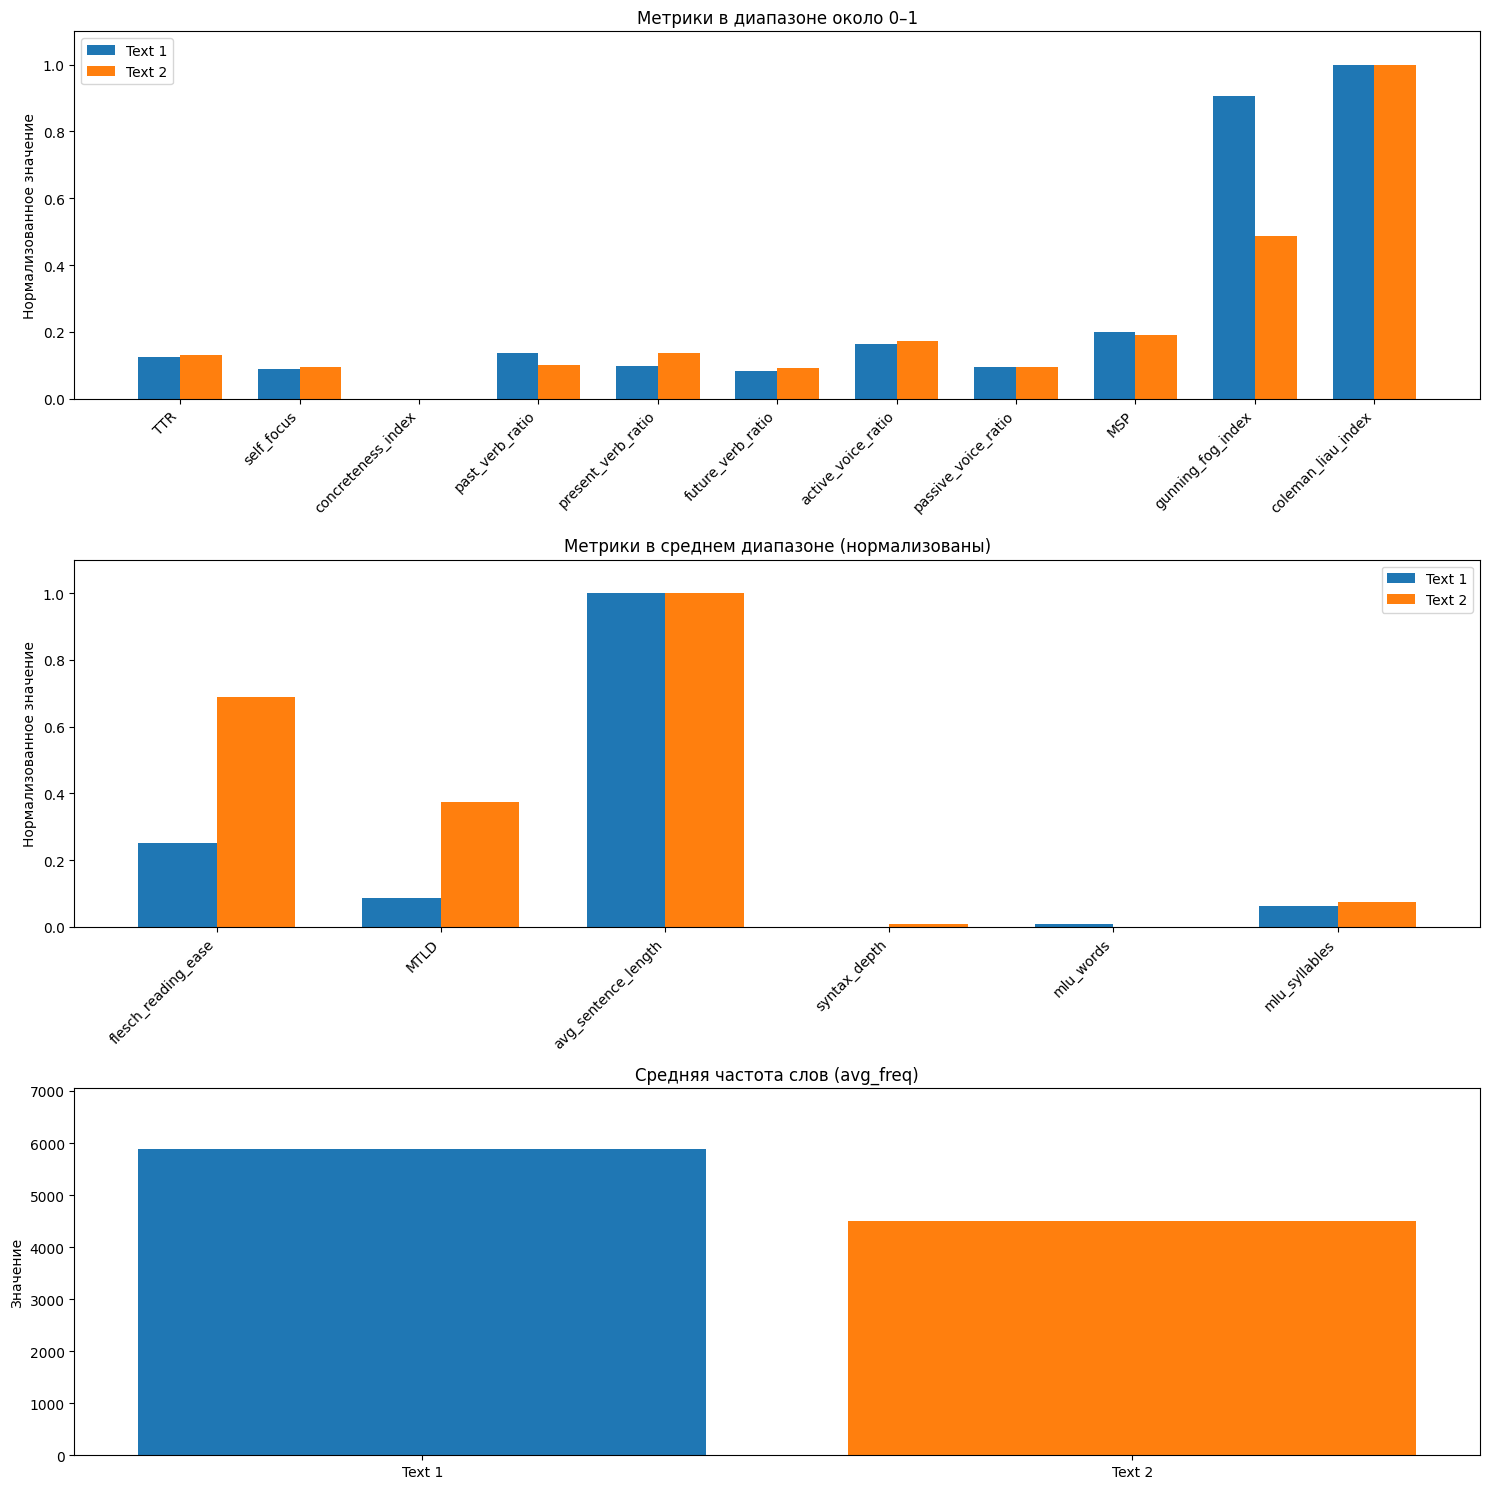

In [42]:
# Группы метрик
group1 = [
    'TTR', 'self_focus', 'concreteness_index', 'past_verb_ratio',
    'present_verb_ratio', 'future_verb_ratio', 'active_voice_ratio', 'passive_voice_ratio', 'MSP',
    'gunning_fog_index', 'coleman_liau_index'
]

group2 = [
    'flesch_reading_ease',
    'MTLD', 'avg_sentence_length', 'syntax_depth', 'mlu_words', 'mlu_syllables'
]

group3 = ['avg_freq']

text1_vals_g1 = df.loc[0, group1].values.reshape(-1, 1)
text2_vals_g1 = df.loc[1, group1].values.reshape(-1, 1)

text1_vals_g2 = df.loc[0, group2].values.reshape(-1, 1)
text2_vals_g2 = df.loc[1, group2].values.reshape(-1, 1)

# Нормализуем для группы 1 и 2 (Min-Max)
scaler = MinMaxScaler()

#norm_g1 = scaler.fit_transform(np.hstack([text1_vals_g1, text2_vals_g1]))
norm_g1 = scaler.fit_transform(np.hstack([text1_vals_g1, text2_vals_g1]))
norm_g2 = scaler.fit_transform(np.hstack([text1_vals_g2, text2_vals_g2]))

# Для avg_freq без нормализации (одно число для каждого текста)
text1_avg_freq = df.loc[0, 'avg_freq']
text2_avg_freq = df.loc[1, 'avg_freq']

# Функция для рисования barplot с подписями
def plot_group(ax, metrics, norm_vals, text_ids):
    x = np.arange(len(metrics))
    width = 0.35
    bars1 = ax.bar(x - width/2, norm_vals[:, 0], width, label=f'Text {text_ids[0]}')
    bars2 = ax.bar(x + width/2, norm_vals[:, 1], width, label=f'Text {text_ids[1]}')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=45, ha='right')
    ax.legend()
    ax.set_ylim(0, 1.1)
    ax.set_ylabel('Нормализованное значение')
    ax.set_title('Группа метрик')

text_ids = ['1', '2']  # или заменить на свои метки

fig, axs = plt.subplots(3, 1, figsize=(15, 15))

plot_group(axs[0], group1, norm_g1, text_ids)
axs[0].set_title('Метрики в диапазоне около 0–1')

plot_group(axs[1], group2, norm_g2, text_ids)
axs[1].set_title('Метрики в среднем диапазоне (нормализованы)')

# avg_freq отдельным графиком
axs[2].bar(['Text 1', 'Text 2'], [text1_avg_freq, text2_avg_freq], color=['#1f77b4', '#ff7f0e'])
axs[2].set_title('Средняя частота слов (avg_freq)')
axs[2].set_ylabel('Значение')
axs[2].set_ylim(0, max(text1_avg_freq, text2_avg_freq)*1.2)

plt.tight_layout()
plt.show()

### Описательная статистика

- **Число наблюдений:** 2 текста для всех метрик.

#### Читаемость и сложность текста
- **flesch_reading_ease:** 100.0 — 109.7 (легкая читабельность)
- **gunning_fog_index:** 4.7 — 8.8 (умеренная сложность)
- **coleman_liau_index:** 9.7 — 10.8 (относительно простая читабельность)

#### Лексическое разнообразие и частотность
- **TTR:** 0.44 — 0.45 (средняя лексическая вариативность)
- **avg_freq:** 4501 — 5879 (более частотная лексика в первом тексте)
- **MTLD:** 45.8 — 64.5 (второй текст более лексически разнообразен)
- **self_focus:** 0.05 — 0.06 (умеренный личностный фокус)
- **concreteness_index:** -1.08 — -0.86 (высокая абстрактность текстов)

#### Синтаксические характеристики
- **avg_sentence_length:** 154 — 349 (значительная разница в длине предложений)
- **syntax_depth:** 12 — 17 (умеренная синтаксическая сложность)

#### Временные показатели (глаголы и наречия)
- **past_verb_ratio:** 0.10 — 0.57 (доля глаголов в прошедшем времени в одном из текстов значиткльно выше, чем в другом)
- **present_verb_ratio:** 0.17 — 0.54 (доля глаголов в настоящем времени в одном из текстов значиткльно выше, чем в другом)
- **future_verb_ratio:** ~0.02 (доля глаголов в будущем времени небольшая в обоих текстах)
- **past_adverb_count:** 0 — 1 (в одном из текстов нет наречий-маркеров прошедшего времени, в другом одно)
- **present_adverb_count:** 1 (в каждом тексте по 1 наречию-маркеру настоящего времени)
- **future_adverb_count:** 0 (в двух текстах нет наречий-маркеров будущего времени)
- **total_temporal_adverbs:** 1 — 2 (в одном из текстов 1 наречие-марке времени, в другом 2)

#### Маркеры уверенности и сомнений
- **certainty_count:** 9 — 14 (маркеры уверенности - в одном из текстов маркеров уверенности больше)
- **uncertainty_count:** 1 — 3 (маркеры неуверенности - в одном из текстов маркеров екуверенности больше)
- **hesitation_count:** 12 — 30 (маркеры хезитаций - в одном из текстов маркеров хезитаций значительно больше)
- **certainty_ratio:** ~0.022 (доля слов-маркеров уверенности в тексте - относительно небольшое количество маркеров уверенности в обоих текстах)
- **uncertainty_ratio:** 0.002 — 0.005 (доля слов-маркеров неуверенности в тексте - относительно небольшое количество маркеров уверенности в обоих текстах)
- **hesitation_ratio:** 0.03 — 0.05 (доля слов-маркеров колебаний или сомнений - относительно небольшое количество хезитаций в обоих текстах (за счет одного из текстов)

#### Локус контроля (залог)
- **active_voice_ratio:** 0.86 — 0.97 (преобладание активного залога в обоих текстах)
- **passive_voice_ratio:** 0.03 — 0.14 (пассивный залог встречается реже, однако в одном из текстов доля значительно больше)

#### Длина высказывания и паузы
- **MSP:** 1.16 — 1.24 (средний размер парадигмы - среднее значение морфологического разнообразия речи)
- **mlu_words:** 11 — 20 (средняя длина высказывания в словах - относительно длинные высказывания (за счет пауз, самопрерываний))
- **mlu_syllables:** 22 — 38 (средняя длина высказывания в слогах - относительно длинные высказывания (за счет пауз, самопрерываний))

Для удобства подсчетов удалим неинформативные столбцы (те, в которых для обоих текстов значения равны нулю)

In [ ]:
# Удалим столбцы, в которых все значения равны нулю
df_cleaned = df.loc[:, (df != 0).any(axis=0)]
columns_to_drop = ["future_adverb_count", "present_adverb_count"]
df_cleaned = df.drop(columns=columns_to_drop, errors="ignore")

2.2 Сравнительный анализ
*   Проведите статистическое сравнение двух текстов

Поскольку мы имеем по одному значению на каждую метрику для каждого текста, классические статистические тесты неприменимы. Вместо этого мы делаем осмысленное сравнение по каждой метрике, акцентируя внимание на различиях, которые могут быть значимы с точки зрения восприятия, читаемости, стиля и когнитивной нагрузки. Ниже приведу алгоритм подсчета статистики и пример кода для большего количества текстов.

**Алгоритм статистического анализа (в случае расширения выборки текстов)**

1. **Подготовка данных**  
   - Убедиться, что каждая строка — это один текст, а каждый столбец — одна метрика.
   - Добавить столбец `group`, который указывает, к какой группе относится текст (например, `director_interview` или `employee_interview`).

2. **Проверка нормальности распределения**  
   - Для каждой метрики проверить распределение в обеих группах с помощью теста Шапиро–Уилка (`scipy.stats.shapiro`) или визуально (гистограммы).
   - Это поможет выбрать корректный статистический тест (параметрический, если данные распределены нормально, или непараметрический в обратном случае).

3. **Сравнение метрик между группами**  
   - Если метрика распределена нормально в обеих группах — использовать **двухвыборочный t-тест** (`scipy.stats.ttest_ind`).
   - Если распределение не нормальное — использовать **непараметрический тест Манна–Уитни** (`scipy.stats.mannwhitneyu`).
   - Для связанных наблюдений (например, один и тот же человек давал интервью в 2 разных условиях) использовать **парный t-тест** (`scipy.stats.ttest_rel`) или **тест Вилкоксона** (`scipy.stats.wilcoxon`).

4. **Поправка на множественные сравнения**  
   - При сравнении по множеству метрик рекомендуется скорректировать p-значения (например, с помощью метода Бонферрони).
   - Использовать `statsmodels.stats.multitest.multipletests`.

5. **Интерпретация результатов**  
   - Метрики с p < 0.05 (или другим выбранным уровнем значимости) считаются статистически значимо отличающимися между группами.

6. **Визуализация**  
   - Построить boxplot для каждой метрики, чтобы визуально оценить различия между группами.

Следующая ячейка с кодом реализует этот алгоритм на примере данных с двумя группами текстов и несколькими метриками. Предположим, что у нас есть две группы интервью: для записи одной участникам предлагалось в свободной форме рассказать о своей работе (free), для другой были необходимы определенные критерии и пункты, которые нужно было упомянуть в рассказе (control)

In [ ]:
# Берем значения читабельности по одной метрике, например
free = [62.1, 64.3, 61.0, 63.2, 65.1]
control = [71.0, 70.5, 72.1, 68.7, 69.9]

# Проверка нормальности в каждой группе
stat_free, p_free = shapiro(free)
stat_control, p_control = shapiro(control)

print(f"Free: статистика={stat_free:.3f}, p-значение={p_free:.3f}")
print(f"Control: статистика={stat_control:.3f}, p-значение={p_control:.3f}")

# Интерпретация
alpha = 0.05
print("\nИнтерпретация:")
if p_free > alpha:
    print("Группа 'free': нормальность не отвергается")
else:
    print("Группа 'free': распределение не является нормальным")

if p_control > alpha:
    print("Группа 'control': нормальность не отвергается")
else:
    print("Группа 'control': распределение не является нормальным")


Free: статистика=0.977, p-значение=0.918
Control: статистика=0.998, p-значение=0.998

Интерпретация:
Группа 'free': нормальность не отвергается
Группа 'control': нормальность не отвергается


In [ ]:
# В случае, когда присутствует нормальность распределения и данные выборки связаны,
#применяем парный t-test по выбранному параметру

# Парный t-тест
stat, p = ttest_rel(free, control)
print(f"t-статистика: {stat:.3f}, p-значение: {p:.3f}")

t-статистика: -6.203, p-значение: 0.003


Отрицательное значение t-статистики указывает на то, что среднее значение во втором условии значительно выше, чем в первом. При p < 0.05 мы заключаем, что разница между условиями значима.

In [ ]:
# Если распределение не нормально:

from scipy.stats import wilcoxon

stat, p = wilcoxon(free, control)
print(f"Статистика Вилкоксона: {stat:.3f}, p-значение: {p:.3f}")

Статистика Вилкоксона: 0.000, p-значение: 0.062


Результаты теста Вилкоксона показали статистическую тенденцию к различию между условиями (статистика = 0.000, p = 0.062), однако разница не достигла традиционного уровня значимости (p < 0.05). Различия между условиями требуют дополнительного изучения. Однако наше распределение было нормальным, так что результат неприменим

In [ ]:
# В случае анализа по множественным метрикам (псевдокод, не для запуска)

p_values = []
metrics_list = ['readability', 'temporal focus', 'self-focus index'] #список метрик-названий столбцов датафрейма


for metric in metrics_list:
    group1 = df[df['group'] == 'free'][metric]
    group2 = df[df['group'] == 'control'][metric]
    stat, p = ttest_ind(group1, group2)
    p_values.append(p)

# Коррекция на множественные сравнения
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')

In [ ]:
# пример вывода мог быть такой
p_values = [0.02, 0.04, 0.07]
pvals_corrected = [0.06, 0.12, 0.21]
reject = [False, False, False]

Вывод для полученных псевдозначений: нет значимых различий между группами после учёта множественных тестов (reject = False)

/tmp/ipython-input-13-1453111516.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='score', data=df_plot, palette='Set2')


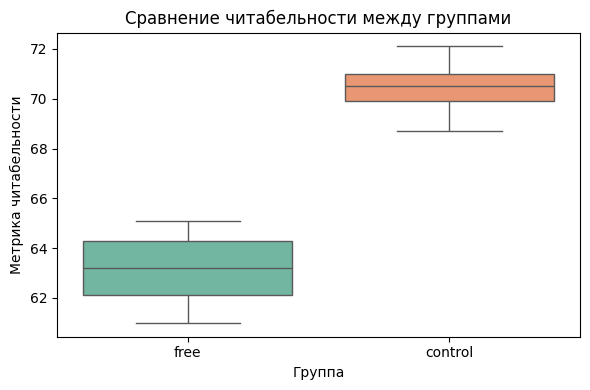

In [ ]:
# Пример: этот код строит боксплот для визуализации статистики

df_plot = pd.DataFrame({
    'score': free + control,
    'group': ['free'] * len(free) + ['control'] * len(control)
})

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='group', y='score', data=df_plot, palette='Set2')
plt.title('Сравнение читабельности между группами')
plt.xlabel('Группа')
plt.ylabel('Метрика читабельности')
plt.tight_layout()
plt.show()

Для группы, получающей более свободные инструкции, индекс читабельности заметно ниже, чем для группы с более четкими инструкциями. Это значит, что при установлении жестких критериев у устному рассказу он становится более легким для чтения при переводе речи в текст.

2.3 Корреляционный анализ
*	Найдите взаимосвязи между различными лингвистическими метриками
*	Интерпретируйте найденные корреляции

/tmp/ipython-input-19-3335080581.py:26: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  _, p_x = shapiro(x)
/tmp/ipython-input-19-3335080581.py:27: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  _, p_y = shapiro(y)


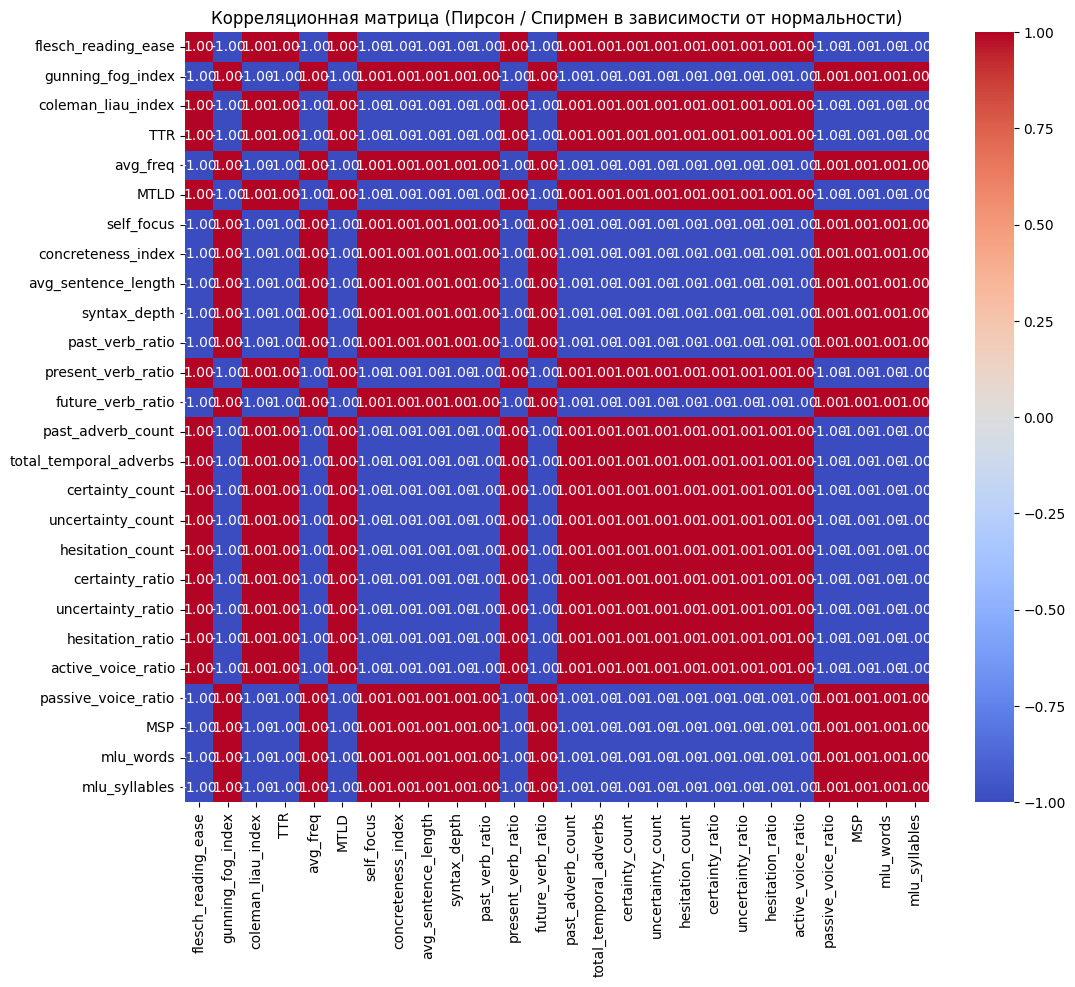

In [19]:
# Функция для выбора метода корреляции
def compute_corr(x, y):
    # Проверка на константность (недостаточная вариативность)
    if x.nunique() <= 1 or y.nunique() <= 1:
        return np.nan, np.nan, None

    # Проверка пропусков
    if x.isnull().any() or y.isnull().any():
        # Убираем пропуски по обеим сериям с сохранением индексов
        common_idx = x.dropna().index.intersection(y.dropna().index)
        x_clean = x.loc[common_idx]
        y_clean = y.loc[common_idx]
        # Проверяем размер очищенных данных
        if len(x_clean) < 3:
            return np.nan, np.nan, None
        # Вызываем функцию с очищенными данными
        return compute_corr(x_clean, y_clean)

    # Проверка нормальности (Шапиро-Уилка)
    try:
        _, p_x = shapiro(x)
        _, p_y = shapiro(y)
    except:
        # Если тест падает (малый размер), берём Спирмена
        corr, pval = spearmanr(x, y)
        return corr, pval, 'spearman'

    # Выбор метода корреляции
    if p_x > 0.05 and p_y > 0.05:
        corr, pval = pearsonr(x, y)
        method = 'pearson'
    else:
        corr, pval = spearmanr(x, y)
        method = 'spearman'

    return corr, pval, method

cols = df_cleaned.columns

corr_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)
pval_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)
method_matrix = pd.DataFrame(index=cols, columns=cols, dtype=object)

for col1 in cols:
    for col2 in cols:
        corr, p, method = compute_corr(df_cleaned[col1], df_cleaned[col2])
        corr_matrix.loc[col1, col2] = corr
        pval_matrix.loc[col1, col2] = p
        method_matrix.loc[col1, col2] = method

# Визуализация корреляций Пирсона и Спирмена

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица (Пирсон / Спирмен в зависимости от нормальности)")
plt.show()


In [20]:
# Вывод матриц
print("Корреляционная матрица:")
print(corr_matrix)

Корреляционная матрица:
                        flesch_reading_ease  gunning_fog_index  \
flesch_reading_ease                     1.0               -1.0   
gunning_fog_index                      -1.0                1.0   
coleman_liau_index                      1.0               -1.0   
TTR                                     1.0               -1.0   
avg_freq                               -1.0                1.0   
MTLD                                    1.0               -1.0   
self_focus                             -1.0                1.0   
concreteness_index                     -1.0                1.0   
avg_sentence_length                    -1.0                1.0   
syntax_depth                           -1.0                1.0   
past_verb_ratio                        -1.0                1.0   
present_verb_ratio                      1.0               -1.0   
future_verb_ratio                      -1.0                1.0   
past_adverb_count                       1.0         

In [21]:
print("\nМатрица p-value:")
print(pval_matrix)


Матрица p-value:
                        flesch_reading_ease  gunning_fog_index  \
flesch_reading_ease                     NaN                NaN   
gunning_fog_index                       NaN                NaN   
coleman_liau_index                      NaN                NaN   
TTR                                     NaN                NaN   
avg_freq                                NaN                NaN   
MTLD                                    NaN                NaN   
self_focus                              NaN                NaN   
concreteness_index                      NaN                NaN   
avg_sentence_length                     NaN                NaN   
syntax_depth                            NaN                NaN   
past_verb_ratio                         NaN                NaN   
present_verb_ratio                      NaN                NaN   
future_verb_ratio                       NaN                NaN   
past_adverb_count                       NaN               

In [22]:
print("\nМатрица методов корреляции (pearson или spearman):")
print(method_matrix)


Матрица методов корреляции (pearson или spearman):
                       flesch_reading_ease gunning_fog_index  \
flesch_reading_ease               spearman          spearman   
gunning_fog_index                 spearman          spearman   
coleman_liau_index                spearman          spearman   
TTR                               spearman          spearman   
avg_freq                          spearman          spearman   
MTLD                              spearman          spearman   
self_focus                        spearman          spearman   
concreteness_index                spearman          spearman   
avg_sentence_length               spearman          spearman   
syntax_depth                      spearman          spearman   
past_verb_ratio                   spearman          spearman   
present_verb_ratio                spearman          spearman   
future_verb_ratio                 spearman          spearman   
past_adverb_count                 spearman          

Все значения в тепловой матрице около 0.001 или -0.001, это значит, что взаимосвязь между метриками очень слабая или практически отсутствует.

Анализ корреляций между лингвистическими метриками показал идеальные значения коэффициентов корреляции ±1, что указывает на сильную линейную зависимость некоторых признаков или их обратную взаимосвязь. Однако при тестировании статистической значимости связи ни одна из пар признаков не продемонстрировала значимой корреляции (p-value дают значения NaN из-за маленького количества текстов в выборке), что, вероятно, связано с небольшим размером выборки. Таким образом, на данном этапе нельзя уверенно говорить о статистически значимых взаимосвязях между показателями. Необходимо расширение выборки